In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Note: API Key from OpenWeather website
# on config.py sheet

In [2]:
#[1] 6.1.4

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#[2]

# Add the latitudes and longitudes to a list.
# note: this code was generated on API_practice sheet
# the next cell (coordinates) unzips the previous code
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-0.3372643020263979, -20.280018948170607),
 (-43.513824002422524, -95.64149968580804),
 (-22.195430473918066, -78.71811779798836),
 (23.234419539450798, 162.47915503857513),
 (84.08903982441635, 16.570724232583757),
 (-7.385229919110543, 65.0654293909545),
 (10.224826405040986, -44.18509727187046),
 (58.11279713537809, 85.11528218127688),
 (-58.968108268904146, -3.7030718162521055),
 (59.716536309755895, 130.75986320148246),
 (15.311413074897814, -54.86968800186122),
 (-59.74485200347912, 3.4318421227631006),
 (-26.861292314010413, 164.01813121128055),
 (-68.37802315806528, -121.82074345788612),
 (29.866726409466594, -67.35847460247128),
 (58.10474271977745, -76.29193160990361),
 (82.89504790629664, -15.000376076801558),
 (15.08647363265662, -55.66436845714024),
 (-19.159082328916682, -123.41439883088319),
 (-7.179089817375271, -45.77084100477887),
 (73.29742679182812, -32.858561470698874),
 (-27.0367127432199, 19.72785344348989),
 (46.156206185970376, 144.12066920967084),
 (73.76297

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy         

In [6]:
#[3]

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
#[4] 6.2.6

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c65ada4e44aea17f126e673d0507af96


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [10]:
#[5]

# initialized the counters at 1 because we want 
# the first iteration of the logging for each recorded 
# response and the set to start at 1

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Next, we need to iterate through our list of cities 
# and begin building the URL for each city, while grouping 
# our records in sets of 50. To do this, use 
# for i in range(len(cities)) and the index to tell us when we get to 50. 
# We can also retrieve the city from the cities list and add it to 
# the city_url by using indexing, as shown in the following code:


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Every time we want to reference the city in our code, 
# we need to use the indexing on the cities list. Unfortunately, 
# this will cause programming errors when we are building the city_url 
# because it adds the index, not the city name, to the city_url. 
# To fix this issue, we need to create another for loop to get the city from the cities list.

# Instead of using two for loops, we can use the enumerate() method as 
# an alternative way to iterate through the list of cities and retrieve both the index, 
# and the city from the list. The syntax for the enumerate() method is the following:
# for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
# We create the for loop with the enumerate() method and reference the index and the city in the list.

# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and 
# if the index is greater than or equal to 50. If the statement is true, then the set_count and the 
# record_count are incremented by 1.

# Inside the conditional statement, we create the URL endpoint for each city, as before. However, 
# we are removing the blank spaces in the city name and concatenating the city name with, 
# city.replace(" ","+"). This will find the corresponding weather data for the city instead of 
# finding the weather data for the first part of the city name.

# Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).

# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.

# Then we add one to the record count before the next city is processed.
# Next, we will retrieve the data from the JSON weather response for each city.

# handle errors while parsing weather data from a JSON file.
# try:
  #Do something
#except:
  #print("An exception occurred")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | georgetown
Processing Record 2 of Set 13 | castro
Processing Record 3 of Set 13 | marcona
City not found. Skipping...
Processing Record 4 of Set 13 | butaritari
Processing Record 5 of Set 13 | longyearbyen
Processing Record 6 of Set 13 | victoria
Processing Record 7 of Set 13 | cayenne
Processing Record 8 of Set 13 | belyy yar
Processing Record 9 of Set 13 | cape town
Processing Record 10 of Set 13 | chagda
City not found. Skipping...
Processing Record 11 of Set 13 | bathsheba
Processing Record 12 of Set 13 | hermanus
Processing Record 13 of Set 13 | noumea
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | hamilton
Processing Record 16 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 13 | sao raimundo das mangabeiras
Processing Record 19 of Set 13 | tasiilaq
Proce

Processing Record 30 of Set 16 | sambava
Processing Record 31 of Set 16 | carnarvon
Processing Record 32 of Set 16 | baykit
Processing Record 33 of Set 16 | kieta
Processing Record 34 of Set 16 | pampa
Processing Record 35 of Set 16 | lata
Processing Record 36 of Set 16 | phan thiet
Processing Record 37 of Set 16 | cherskiy
Processing Record 38 of Set 16 | thompson
Processing Record 39 of Set 16 | rocha
Processing Record 40 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 41 of Set 16 | half moon bay
Processing Record 42 of Set 16 | cariamanga
Processing Record 43 of Set 16 | ponta do sol
Processing Record 44 of Set 16 | mar del plata
Processing Record 45 of Set 16 | menongue
Processing Record 46 of Set 16 | pucallpa
Processing Record 47 of Set 16 | bilibino
Processing Record 48 of Set 16 | gizo
Processing Record 49 of Set 16 | vao
Processing Record 50 of Set 16 | tuktoyaktuk
Processing Record 1 of Set 17 | monrovia
Processing Record 2 of Set 17 | toora-khem
Processing Record 3 

Processing Record 17 of Set 20 | grindavik
Processing Record 18 of Set 20 | beian
Processing Record 19 of Set 20 | swellendam
Processing Record 20 of Set 20 | saskylakh
Processing Record 21 of Set 20 | nizhniy tsasuchey
Processing Record 22 of Set 20 | tautira
Processing Record 23 of Set 20 | lahaina
Processing Record 24 of Set 20 | pahrump
Processing Record 25 of Set 20 | le vauclin
Processing Record 26 of Set 20 | north bend
Processing Record 27 of Set 20 | bourbonnais
Processing Record 28 of Set 20 | egvekinot
Processing Record 29 of Set 20 | ballina
Processing Record 30 of Set 20 | yeppoon
Processing Record 31 of Set 20 | severo-kurilsk
Processing Record 32 of Set 20 | santa cecilia
Processing Record 33 of Set 20 | great yarmouth
Processing Record 34 of Set 20 | sola
Processing Record 35 of Set 20 | opuwo
Processing Record 36 of Set 20 | juegang
Processing Record 37 of Set 20 | dhidhdhoo
Processing Record 38 of Set 20 | mandalgovi
Processing Record 39 of Set 20 | algiers
Processing

City not found. Skipping...
Processing Record 5 of Set 24 | hede
Processing Record 6 of Set 24 | bannu
Processing Record 7 of Set 24 | sao filipe
Processing Record 8 of Set 24 | pervomayskiy
Processing Record 9 of Set 24 | olinda
Processing Record 10 of Set 24 | pemangkat
Processing Record 11 of Set 24 | tabat
Processing Record 12 of Set 24 | mantua
Processing Record 13 of Set 24 | coolum beach
Processing Record 14 of Set 24 | sovetskiy
Processing Record 15 of Set 24 | khandyga
Processing Record 16 of Set 24 | santiago del estero
Processing Record 17 of Set 24 | aleksandrov gay
Processing Record 18 of Set 24 | padang
Processing Record 19 of Set 24 | mildura
Processing Record 20 of Set 24 | katherine
Processing Record 21 of Set 24 | aanekoski
Processing Record 22 of Set 24 | rungata
City not found. Skipping...
Processing Record 23 of Set 24 | sulangan
Processing Record 24 of Set 24 | marzuq
Processing Record 25 of Set 24 | vilyuysk
Processing Record 26 of Set 24 | zheleznodorozhnyy
Proc

In [11]:
len(city_data)

554

In [12]:
#[6]

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,80.01,94,20,2.15,MY,2021-03-25 19:49:56
1,Castro,-24.7911,-50.0119,73.53,81,51,3.18,BR,2021-03-25 19:51:08
2,Butaritari,3.0707,172.7902,81.10,79,100,13.58,KI,2021-03-25 19:51:08
3,Longyearbyen,78.2186,15.6401,23.00,74,90,18.41,SJ,2021-03-25 19:51:08
4,Victoria,22.2855,114.1577,68.00,78,5,1.01,HK,2021-03-25 19:49:55
5,Cayenne,4.9333,-52.3333,86.00,62,10,14.97,GF,2021-03-25 19:51:09
6,Belyy Yar,53.6039,91.3903,28.40,80,100,4.47,RU,2021-03-25 19:51:09
7,Cape Town,-33.9258,18.4232,68.00,88,90,16.11,ZA,2021-03-25 19:51:09
8,Bathsheba,13.2167,-59.5167,82.40,54,40,20.71,BB,2021-03-25 19:51:10
9,Hermanus,-34.4187,19.2345,70.00,76,92,5.48,ZA,2021-03-25 19:51:10


In [13]:
# Next, we'll reorder the columns as City, Country, 
# Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
# so they are easy to read.

# Recall that to reorder the columns, we assign a variable to an array 
# of the columns in the order we want them to appear:

# new_column_order = ["column2", "column4", "column1"]

# Then, we assign a new or the same DataFrame with new column order:

# df = df[new_column_order]
# We can also use 
# new column_order = ["City", "country", "Date", ...]
# city_data_df = city_data_df[new_column_order]
# city_data_df

city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-03-25 19:49:56,5.4112,100.3354,80.01,94,20,2.15
1,Castro,BR,2021-03-25 19:51:08,-24.7911,-50.0119,73.53,81,51,3.18
2,Butaritari,KI,2021-03-25 19:51:08,3.0707,172.7902,81.10,79,100,13.58
3,Longyearbyen,SJ,2021-03-25 19:51:08,78.2186,15.6401,23.00,74,90,18.41
4,Victoria,HK,2021-03-25 19:49:55,22.2855,114.1577,68.00,78,5,1.01
...,...,...,...,...,...,...,...,...,...
549,Tabou,CI,2021-03-25 19:54:04,4.4230,-7.3528,79.20,84,100,5.14
550,Taksimo,RU,2021-03-25 19:54:05,56.3444,114.8794,18.37,94,100,0.94
551,Milverton,CA,2021-03-25 19:54:05,43.5668,-80.9164,68.00,42,100,13.80
552,Vallenar,CL,2021-03-25 19:54:05,-28.5708,-70.7581,81.52,31,0,10.09


In [14]:
#[7]

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        554 non-null    object 
 1   Country     554 non-null    object 
 2   Date        554 non-null    object 
 3   Lat         554 non-null    float64
 4   Lng         554 non-null    float64
 5   Max Temp    554 non-null    float64
 6   Humidity    554 non-null    int64  
 7   Cloudiness  554 non-null    int64  
 8   Wind Speed  554 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 39.1+ KB


In [16]:
#[8]

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

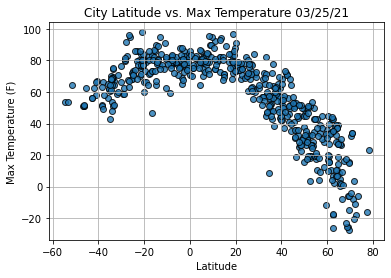

In [17]:
#[9]

# add time.strftime("%x") to our plt.title() function in our scatter plot.

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

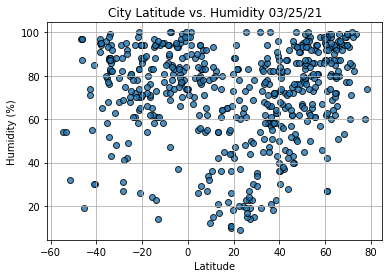

In [18]:
#[10]

# The balance of the scatter plots will share the same format. 
# All we need to do is change the y-axis variable for each 
# weather parameter. Let's create the scatter plots quickly 
# by copying the code and changing the y-axis variable.

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()



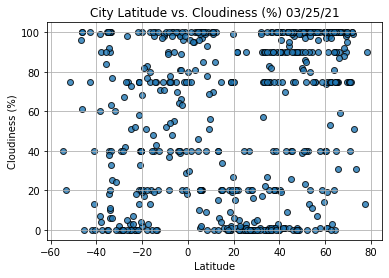

In [19]:
#[10a]

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

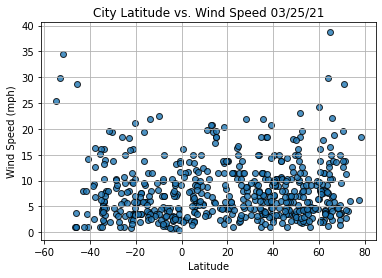

In [20]:
#[10b]

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
#[11]

# create a function, "plot_linear_regression", and add the 
# four parameters inside the parentheses.

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# def plot_linear_regression(lats, max_temps, title, y_label, text_coordinates):

In [22]:
#[11a] NOTE: NO OUTPUT, just an ex.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [23]:
#[12]

# To solve the issue of City_ID index column

city_data_df = pd.read_csv("weather_data/cities.csv")

In [24]:
#[12]

# To create a new DataFrame from a current 
# DataFrame, we can use the loc method on the current DataFrame.
# The syntax to get a specific row from a current 
# DataFrame is row = df.loc[row_index].

index13 = city_data_df.loc[13]
index13

City_ID                                 13
City          Sao Raimundo Das Mangabeiras
Country                                 BR
Date                   2021-03-25 19:51:12
Lat                                -7.0219
Lng                               -45.4811
Max Temp                             80.82
Humidity                                78
Cloudiness                             100
Wind Speed                            2.95
Name: 13, dtype: object

In [25]:
#[12a]

# We can also filter a DataFrame based on a value of a row. 
# For instance, if we wanted to get all Northern Hemisphere 
# latitudes, for latitudes greater than or equal to 0, we can 
# filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. 
# Executing this code will return either "True" or "False" 
# for all the rows that meet these criteria.

city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
549     True
550     True
551     True
552    False
553     True
Name: Lat, Length: 554, dtype: bool

In [26]:
#[12b]

# If we want to return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the loc method 
# on the city_data_df DataFrame. Inside the brackets, we would add the 
# conditional filter city_data_df["Lat"] >= 0

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Georgetown,MY,2021-03-25 19:49:56,5.4112,100.3354,80.01,94,20,2.15
2,2,Butaritari,KI,2021-03-25 19:51:08,3.0707,172.7902,81.10,79,100,13.58
3,3,Longyearbyen,SJ,2021-03-25 19:51:08,78.2186,15.6401,23.00,74,90,18.41
4,4,Victoria,HK,2021-03-25 19:49:55,22.2855,114.1577,68.00,78,5,1.01
5,5,Cayenne,GF,2021-03-25 19:51:09,4.9333,-52.3333,86.00,62,10,14.97


In [27]:
#[13]

# Now assign this DataFrame to the variable northern_hemi_df 
# to access the data to perform linear regression.

# We can take the same approach to get the cities for the Southern Hemisphere 
# by filtering the city_data_df DataFrame for latitudes less than 0.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Now we can perform linear regression on latitude and maximum 
# temperature from each hemisphere DataFrame.

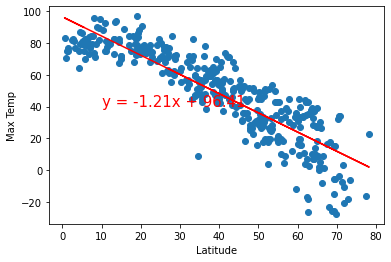

In [28]:
#[13a] 6.4.2

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress 
import matplotlib.pyplot as plt

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10, 40))                                                              

In [29]:
#[13aa]
# Another way of doing #13

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
#print(f"The p-value is: {p_value:.6f}")
print(f"The r-value is: {r_value:.3f}")



y = -1.21x + 96.41
The r-value is: -0.876


In [30]:
#[13aa]
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in x_values] 

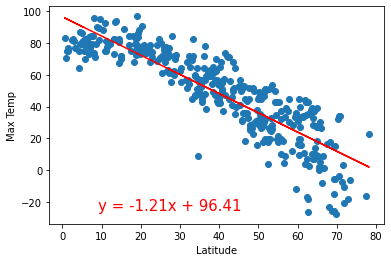

In [31]:
#[13aa]
# Create a scatter plot of the x and y values.
plt.scatter(x_values, y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (9,-25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
#plt.title("Linear Regression on Northern Hemisphere 
#for Maximum Temperature", fontsize=10)
plt.show()

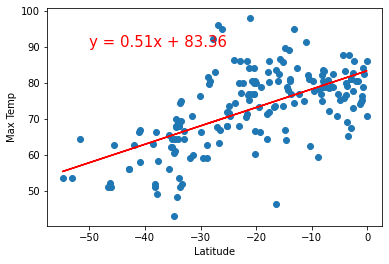

In [38]:
#[14]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50, 90))

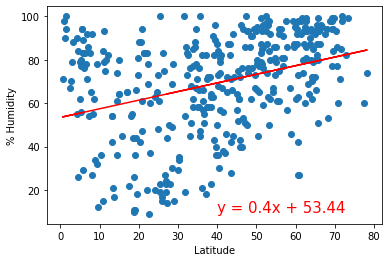

In [39]:
#[15]

# To perform the linear regression on the percent humidity 
# for the Northern Hemisphere, set the x-value equal 
# to the latitude column and y-value equal to the Humidity 
# column from the northern_hemi_df DataFrame.

#Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity', (40,10))

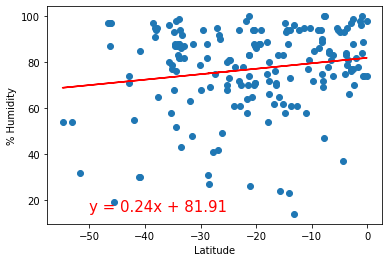

y = 0.24x + 81.91
The p-value is: 0.023
0.16890024586456856


In [34]:
#[16]

# Perform Linear Regression on the Percent Humidity 
# for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
#print(f"The r_value is: {r_value:}")



# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(r_value)

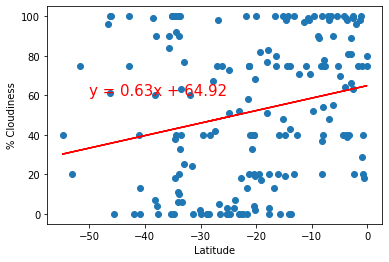

y = 0.63x + 64.92
The p-value is: 0.002
0.2291284347966786
0.2291284347966786


In [35]:
#[17] 

# Perform Linear Regression on the Percent Cloudiness 
# for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))



# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(r_value)

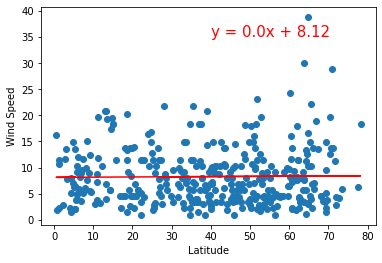

In [36]:
#[18]

# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


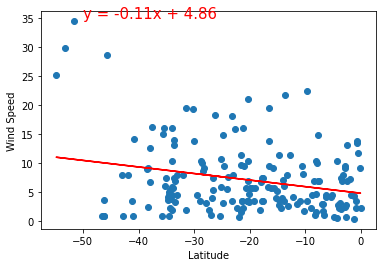

In [37]:
#[19]

# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

